# Nevral stiloverføring utforksende notebooks

Ser på demobilder lagt ved i pystiche

In [1]:
!pip install pystiche
import pystiche
from pystiche import demo, loss, enc, optim
from pystiche.image import show_image, write_image
from pystiche.misc import get_device, get_input_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 KB 785.3 kB/s eta 0:00:00


In [2]:
from PIL import Image

In [3]:
images = demo.images()
images.download()
size = 500
device = get_device()

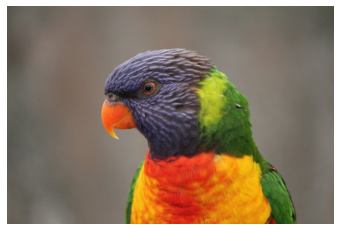

In [4]:
image_bird = images["bird1"].read(size=size, device=device)
image_mosaic = images["mosaic"].read(size=size, device=device)
show_image(image_bird)

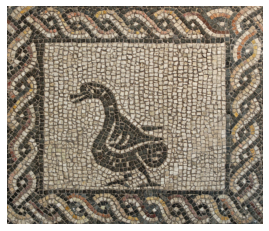

In [5]:
show_image(image_mosaic)

# ønsker å teste dette for content av bird og stil av mosaic

### Funksjon som tar bilde1, bilde2 antall iterasjoner, alfa og beta

In [6]:
def get_style_op(encoder, layer_weight):
    return loss.GramLoss(encoder, score_weight=layer_weight)

def bilde_merging(content_bilde, style_bilde, content_weight, style_weight, num_steps):
    multi_layer_encoder = enc.vgg19_multi_layer_encoder()
    
    #Innholds-bilde
    content_layer = "relu4_2"
    content_encoder = multi_layer_encoder.extract_encoder(content_layer)
    content_weight = content_weight
    content_loss = loss.FeatureReconstructionLoss(
                 content_encoder, score_weight=content_weight)
    
    
    #stil-bilde
    style_layers = ("relu1_1","relu2_1")
    style_weight = style_weight
    style_loss = loss.MultiLayerEncodingLoss(
                multi_layer_encoder, style_layers,
                get_style_op, score_weight=style_weight,)
    
    
    #samensetter de to loss-funskjonene
    perceptual_loss = loss.PerceptualLoss(content_loss, style_loss).to(device)
    
    
    content_image = content_bilde
    style_image = style_bilde
    
    perceptual_loss.set_content_image(content_image)
    perceptual_loss.set_style_image(style_image)
    
    starting_point = "content"
    input_image = get_input_image(starting_point, content_image=content_image)
    show_image(input_image, title="Input image")
    
    #optimasering
    output_image = optim.image_optimization(input_image, perceptual_loss, num_steps=num_steps)
    
    merged_bilde = output_image
    
    return merged_bilde

In [7]:
import matplotlib.pyplot as plt
def save_merged_image(merged_bilde, content_bilde, style_bilde,
                      content_weight, style_weight, num_steps):
    
    return

# Jonas sitt forslag

In [8]:
from pystiche.image import read_image
size = 500
device = get_device()
jonas_content = read_image("../input/pic-merging/Michelangelo1.jpg", size=size, device=device)
jonas_stil = read_image("../input/pic-merging/Kubisme1.jpg", size=size, device=device)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

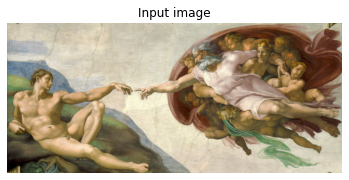

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

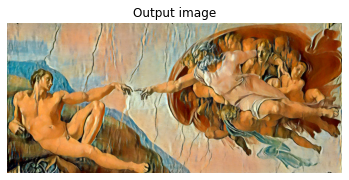

In [9]:
out_put = bilde_merging(jonas_content, jonas_stil, 0.5, 50_00, 500)
show_image(out_put, title="Output image")

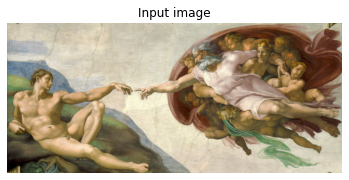

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

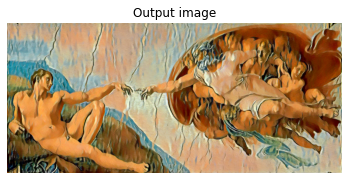

In [10]:
out_put = bilde_merging(jonas_content, jonas_stil, 0.01, 5_000, 500)
show_image(out_put, title="Output image")

In [11]:
jonas_conten_2 = read_image("../input/jonasforslag2/Neutral_face.jpeg", size=size, device=device)
jonas_stil_2 = read_image("../input/jonasforslag2/Sad_man2.jpeg", size=size, device=device)

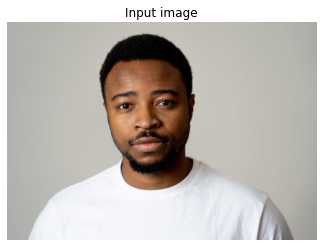

Image optimization:   0%|          | 0/1000 [00:00<?, ?it/s]

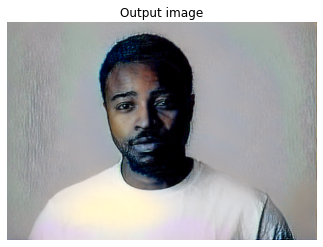

In [12]:
out_put = bilde_merging(jonas_conten_2, jonas_stil_2, 1, 500, 1000)
show_image(out_put, title="Output image")

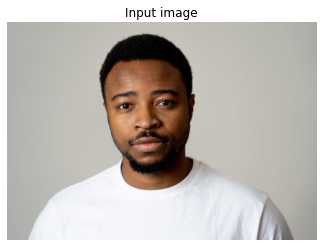

Image optimization:   0%|          | 0/1000 [00:00<?, ?it/s]

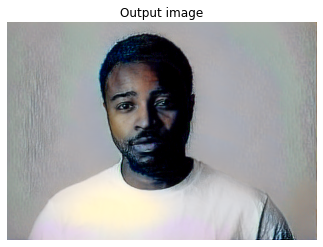

In [13]:
#relu1_1 og 2_1 som stil lag
out_put = bilde_merging(jonas_conten_2, jonas_stil_2, 1, 500, 1000)
show_image(out_put, title="Output image")

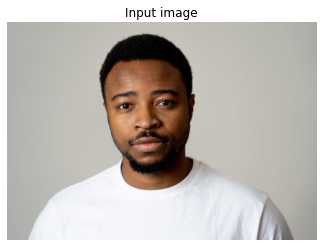

Image optimization:   0%|          | 0/1000 [00:00<?, ?it/s]

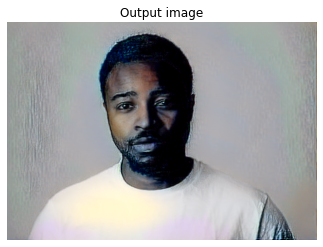

In [14]:
#style_layers = ("relu1_1","relu2_1", "relu3_1", "relu4_1", "relu4_2")
out_put = bilde_merging(jonas_conten_2, jonas_stil_2, 1, 500, 1000)
show_image(out_put, title="Output image")

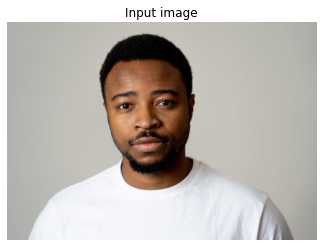

Image optimization:   0%|          | 0/2000 [00:00<?, ?it/s]

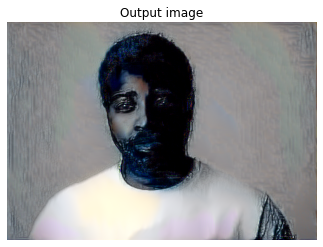

In [15]:
#style_layers = ("relu1_1","relu2_1", "relu3_1")
out_put = bilde_merging(jonas_conten_2, jonas_stil_2, 0.5, 10000, 2000)
show_image(out_put, title="Output image")

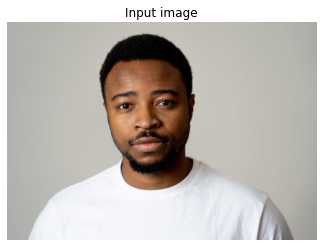

Image optimization:   0%|          | 0/2000 [00:00<?, ?it/s]

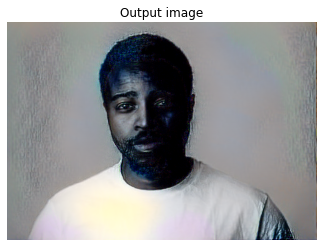

In [16]:
#style_layers = ("relu1_1","relu2_1")
out_put = bilde_merging(jonas_conten_2, jonas_stil_2, 20, 5000, 2000)
show_image(out_put, title="Output image")

In [17]:
sad_1 = read_image("../input/jonasforslag3/Sad_1.jpeg", size=size, device=device)

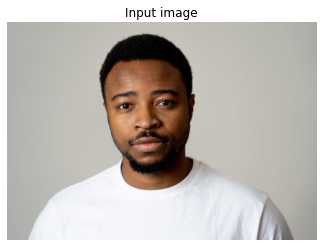

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

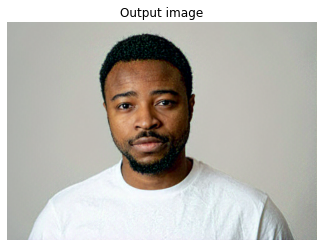

In [18]:
out_put = bilde_merging(jonas_conten_2, sad_1, 500, 1000, 500)
show_image(out_put, title="Output image")

## Trippy hippy vibe

In [19]:
apple_juice_content = read_image("../input/mat-bilder/apple_juice.jpeg", size=size, device=device)
trip_1_stil = read_image("../input/trip-1/Trip_1.jpeg", size=size, device=device)

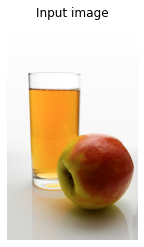

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

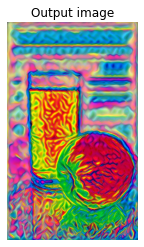

In [20]:
out_put = bilde_merging(apple_juice_content, trip_1_stil, 0.01, 5000, 500)
show_image(out_put, title="Output image")

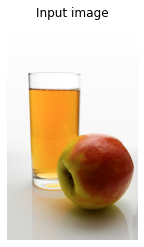

Image optimization:   0%|          | 0/500 [00:00<?, ?it/s]

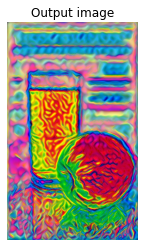

In [21]:
out_put = bilde_merging(apple_juice_content, trip_1_stil, 0.01, 5000, 500)
show_image(out_put, title="Output image")

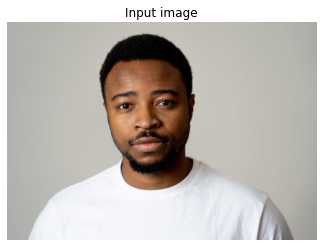

Image optimization:   0%|          | 0/10 [00:00<?, ?it/s]

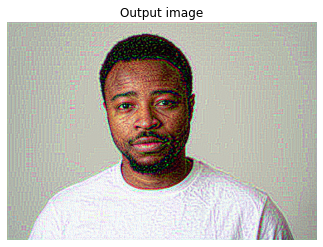

In [22]:
out_put = bilde_merging(jonas_conten_2, trip_1_stil, 0.01, 5000, 10)
show = show_image(out_put, title="Output image")

In [23]:
write_image(out_put, "test.jpeg")